# SD212: Graph mining
## Lab 6: Spectral embedding

In this lab, you will learn to embed the nodes of a graph in a vector space of low dimension. We consider the  embedding based on the top eigenvectors of the transition matrix $P=D^{-1}A$.

## Import

In [2]:
from IPython.display import SVG

In [3]:
import numpy as np
from scipy import sparse
from matplotlib import pyplot as plt

In [4]:
from sknetwork.data import load_netset, karate_club, linear_graph
from sknetwork.embedding import Spectral
from sknetwork.ranking import PageRank
from sknetwork.visualization import svg_graph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph and bipartite graph)

In [5]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

## Karate Club


We first consider the spectral embedding of the [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).

In [6]:
dataset = karate_club(metadata=True)

In [7]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

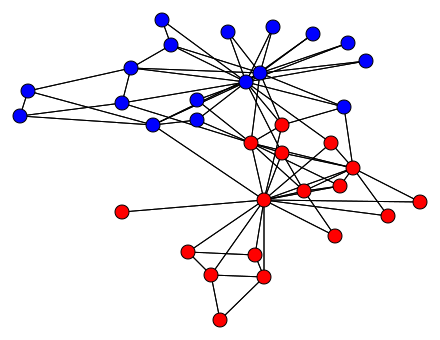

In [8]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Display the spectrum of the transition matrix (e.g., first 20 eigenvalues). 
* What does the spectrum suggest?
* Display the graph with some eigenvectors.
* Display the embedding of the graph in dimension 2.
* Compare the clusters obtained with the sign of the first dimension to the ground-truth clusters.

In [9]:
spectral = Spectral(20, normalized=False)

In [10]:
spectral.fit(adjacency)

Spectral(n_components=20, decomposition='rw', regularization=-1, normalized=False)

In [11]:
# eigenvalues (adding the first)
eigenvalues = [1] + list(spectral.eigenvalues_)

In [12]:
# eigenvectors
eigenvectors = spectral.eigenvectors_

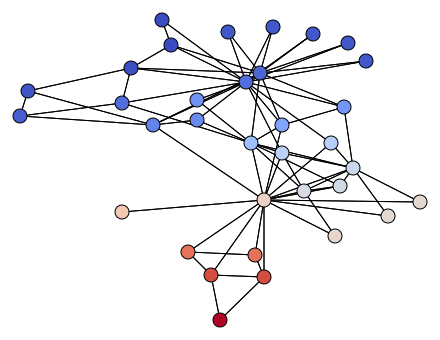

In [13]:
# display eigenvector
image = svg_graph(adjacency, position, scores=eigenvectors[:, 0])
SVG(image)

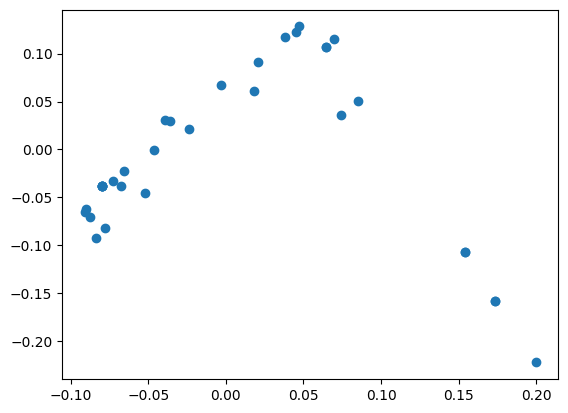

In [14]:
# display the embedding graph in 2D
embedding = spectral.embedding_
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.show()

In [15]:
# compare the clusters obtained with the sign of the first dimension to the ground-truth clusters.
labels_pred = 2 * (embedding[:, 0] > 0) - 1
print(np.sum(labels_pred == labels_true) / len(labels_true))


0.4411764705882353


## Openflights


We now consider a larger graph. We use spectral embedding in dimension 20 to cluster the graph by k-means in the embedding space.

In [16]:
dataset = openflights

In [17]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

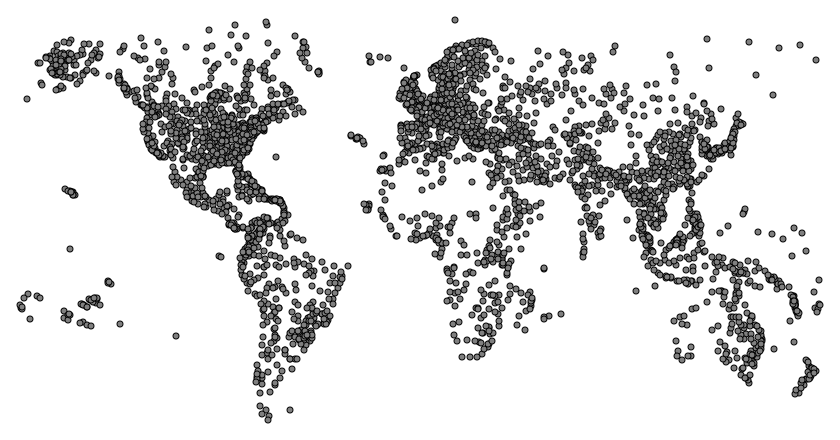

In [18]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with 8 clusters found by k-means in the embedding space.
* Do the same without normalization on the unit sphere (``normalized=False``).<br> Interpret the results. You might compute the distance of the barycenter of each cluster to the origin.

In [19]:
spectral = Spectral(20, normalized=True)

In [20]:
embedding = spectral.fit_transform(adjacency)

## 2. Directed graphs and bipartite graphs

We now work on directed graph and bipartite graphs. We measure proximity between nodes in terms of [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity). Equivalently, we consider the embedding on the unit sphere (``normalized=True``).

## Wikipedia Vitals

In [21]:
dataset = wikivitals

In [22]:
adjacency = dataset.adjacency
biadjacency = dataset.biadjacency
names = dataset.names
words = dataset.names_col
labels = dataset.labels
names_labels = dataset.names_labels
labels_hierarchy = dataset.labels_hierarchy
names_labels_hierarchy = dataset.names_labels_hierarchy

## To do

We first consider the spectral embedding of the graph of links in dimension 20.

* List the 10 articles that are closest to **Vincent van Gogh** in terms of cosine similarity in the embedding space.
* Display the 3D-plot of each label in the embedding space (top 3 dimensions). <br>You might represent each label by a point located at the barycenter of the corresponding articles, with a size proportional to the number of articles. Use ``plotly`` for an interactive plot.
* Display the dendrogram of the top-100 articles on **Arts** (in terms of Personalized PageRank) given by the [Ward method](https://en.wikipedia.org/wiki/Ward%27s_method) in the embedding space (hierarchical clustering).

In [23]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
from scipy.cluster.hierarchy import linkage

## To do

* Repeat the same experiments on the bipartite graph between articles and words.
* List the 10 articles and the 10 words that are closest to the word **painting** in the embedding space.

## To do

* Prove that the average cosine similarity between nodes in some set $S$ is equal to the square distance of the barycenter of $S$ to the origin.

For the following questions, first consider the graph of links, then the bipartite graph between articles and words:

* Compute the average cosine similarity between articles of the **Mammals** category (see hierarchical labels).
* Compare with the expected cosine similarity between two articles sampled uniformly at random.
* Defining a category as **topical** if its average cosine similarity is close to 1, rank the 11 categories (Arts, History,...) by topicality. 
* List the 10 most topical and the 10 less topical hierarchical categories having at least 10 articles (like **Mammals**). 

# Quiz

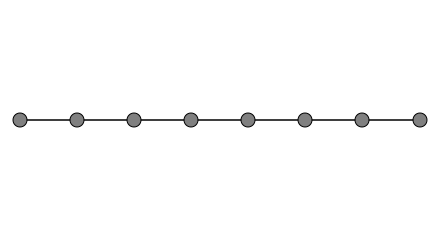

array([-1.87938524, -1.53208889, -1.        , -0.34729636,  0.34729636,
        1.        ,  1.53208889,  1.87938524])

In [ ]:
# linear graph of 8 nodes
graph = linear_graph(8, metadata=True)

# adjacency matrix
adjacency = graph.adjacency
position = graph.position

image = svg_graph(adjacency, position, width=400, height=200)
SVG(image)
display(SVG(image))

# eigenvalues of the Laplacian
D = sparse.diags(adjacency.sum(axis=0).A.ravel())
laplacian = D - adjacency

eigenvalues = np.linalg.eigvalsh(adjacency.toarray())
eigenvalues

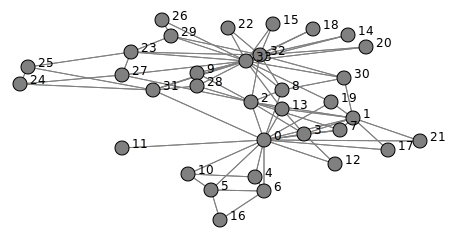

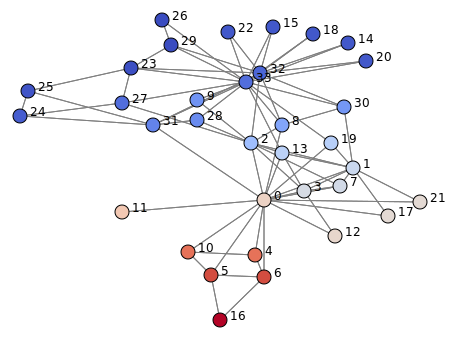

(11, 29)

In [26]:
graph = karate_club(metadata=True)

adjacency = graph.adjacency
position = graph.position

image = svg_graph(adjacency, position, width=400, height=200, names=np.arange(len(position)))
SVG(image)
display(SVG(image))

spectral = Spectral(3, normalized=False)


embedding = spectral.fit_transform(adjacency)

eigenvalues = spectral.eigenvalues_
eigenvectors = spectral.eigenvectors_

# display eigenvector
image = svg_graph(adjacency, position, scores=eigenvectors[:, 0], names=np.arange(len(position)))
SVG(image)
display(SVG(image))

# What is the pair of most distant nodes in terms of cosine similarity in the embedding space?
from scipy.spatial.distance import pdist, squareform

distances = pdist(embedding, metric='cosine')
distances = squareform(distances)
np.unravel_index(np.argmax(distances), distances.shape)